## Example: Three-Link

In [ ]:
import knotted_graph as kg
# print(kg.__version__)
print(f"{kg.__name__} version {kg.__version__}")

import numpy as np
import sympy as sp
import pyvista as pv
import matplotlib.pyplot as plt
from knotted_graph import NodalSkeleton

# Define momentum symbols
kx, ky, kz = sp.symbols('k_x k_y k_z', real=True)

# Define non-Hermitian Bloch vectors
def _k2zw(k_symbols):
    kx, ky, kz = k_symbols
    z = sp.cos(2*kz) + sp.Rational(1, 2) \
        + sp.I*(sp.cos(kx) + sp.cos(ky) + sp.cos(kz) - 2)
    w = sp.sin(kx) + sp.I*sp.sin(ky)
    return z, w

def _zw2d(f, gamma):
    cx = sp.simplify(sp.re(f))
    cz = sp.simplify(sp.im(f))
    return (cx, gamma * sp.I, cz)

def hopf_bloch_vector(gamma, k_symbols=(kx, ky, kz)):
    z, w = _k2zw(k_symbols)
    return _zw2d(z**2 - w**2, gamma)

def trefoil_bloch_vector(gamma, k_symbols=(kx, ky, kz)):
    z, w = _k2zw(k_symbols)
    return _zw2d(z*(z**2 - w**4 + w), gamma)

def threelink_bloch_vector(gamma, k_symbols=(kx, ky, kz)):
    z, w = _k2zw(k_symbols)
    return _zw2d((z**2 - w**2) * z , gamma)

def awesome_bloch_vector(gamma, k_symbols=(kx, ky, kz)):
    """Returns the Bloch vector components for an awesome knot."""
    z, w = _k2zw(k_symbols)
    return _zw2d(z*(z**2-w**4+w), gamma)

gamma = 0.1  # Non-Hermiticity strength

# Initialize the NodalSkeleton with the Hamioltonian characteristic
ske = NodalSkeleton(
    char = threelink_bloch_vector(gamma),
    # k_symbols = (kx, ky, kz), # optional, we named them *conventionally*
    # span = ((-np.pi, np.pi), (-np.pi, np.pi), (0, np.pi))
    # dimension = 200
)

print(f"Hamiltonian is Hermitian: {ske.is_Hermitian}")
print(f"Hamiltonian is PT-symmetric: {ske.is_PT_symmetric}")

knotted_graph version 0.0.1
Hamiltonian is Hermitian: False
Hamiltonian is PT-symmetric: False


In [ ]:
plotter = pv.Plotter(window_size=(1000, 600))
# plotter = pv.Plotter()
plotter = ske.plot_skeleton_graph(plotter,
    add_nodes=True, tube_radius=.02, node_radius=.06,
)
plotter = ske.plot_exceptional_surface(plotter, surf_opacity=.5)

# plotter.add_mesh(ske.spectrum_volume_pv.outline(), color='black', line_width=1)
# plotter.show_bounds(
#     xtitle='k_x', ytitle='k_y', ztitle='k_z', 
#     # show_xlabels=False, show_ylabels=False, show_zlabels=False,
#     ticks='inside',
#     grid=None,
#     font_size=20,
#     all_edges=True,
# )
plotter.add_bounding_box()
plotter.add_legend(
    size=(.2, .15), loc='lower right', 
    bcolor='white', background_opacity=0.7
)

plotter.camera_position = [[-4.8577, -1.7066, 2.4739], [-0.0936, 0.0438, 1.0206], [0.2621, 0.0848, 0.9613]]
# plotter.view_yz()

axes_kwargs = dict(
    xlabel='kx', ylabel='ky', zlabel='kz',
    interactive=True,
    shaft_length=1.6, 
    tip_length=.4,
    label_size=(0.3, 0.15),
)
plotter.add_axes(**axes_kwargs)
plotter.show()

AttributeError: 'Plotter' object has no attribute 'set_axes_position'

In [ ]:
pl2 = pv.Plotter(window_size=(800, 600))
vol = ske.spectrum_volume_pv.copy()
vol['val'] = np.sign(vol['ES_helper']) * np.log1p(np.abs(vol['ES_helper']))
pl2.add_mesh_isovalue(vol, scalars='imag')
pl2.show()
# pl2.export_html(f'./ES_and_SG/threelink_{gamma}_imag_isov_slider.html')

In [133]:
# print cpos
stored_cpos = np.round(list(plotter.camera_position), 4).tolist()
print(f"Camera position: {stored_cpos}")

Camera position: [[-4.8577, -1.7066, 2.4739], [-0.0936, 0.0438, 1.0206], [0.2621, 0.0848, 0.9613]]


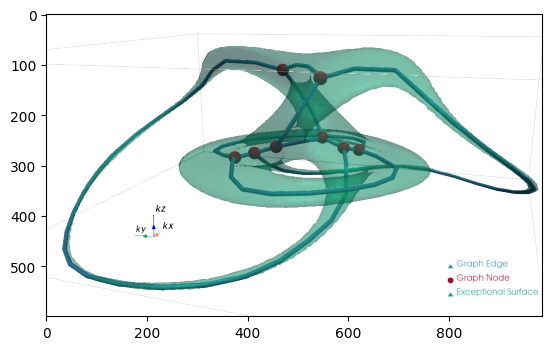

In [137]:
plotter.export_html(f'./ES_and_SG/threelink_gamma={gamma}.html')
plotter.save_graphic(f'./ES_and_SG/threelink_gamma={gamma}.svg', raster=False)
plotter.save_graphic(f'./ES_and_SG/threelink_gamma={gamma}.pdf', raster=False)
shot = plotter.screenshot(f'./ES_and_SG/threelink_gamma={gamma}.png', transparent_background=True, scale=1)
plt.imshow(shot)

In [ ]:
# orbiting

In [8]:
slices = ske.spectrum_volume_pv.slice_orthogonal()
slices

MultiBlock (0x2188c301300)
  N Blocks:   3
  X Bounds:   -3.142e+00, 3.142e+00
  Y Bounds:   -3.142e+00, 3.142e+00
  Z Bounds:   0.000e+00, 3.142e+00

In [ ]:
meshes = [a.copy() for a in plotter.actors.values()]

In [ ]:
slices = mesh.slice_orthogonal(x=100, z=75)

p = pv.Plotter(shape=(2, 2))
# XYZ - show 3D scene first
p.subplot(1, 1)
p.add_mesh(slices, **dargs)
p.show_grid()
p.camera_position = cpos
# XY
p.subplot(0, 0)
p.add_mesh(slices, **dargs)
p.show_grid()
p.camera_position = 'xy'
p.enable_parallel_projection()
# ZY
p.subplot(0, 1)
p.add_mesh(slices, **dargs)
p.show_grid()
p.camera_position = 'zy'
p.enable_parallel_projection()
# XZ
p.subplot(1, 0)
p.add_mesh(slices, **dargs)
p.show_grid()
p.camera_position = 'xz'
p.enable_parallel_projection()

p.show()

In [ ]:
for gamma in [0.1, 0.2, 0.5]:
    print(f"With gamma = {gamma}:\n")

    ske_ = NodalSkeleton(threelink_bloch_vector(gamma))
    # ske_.graph_summary(ske_.skeleton_graph())

    plotter = ske_.plot_skeleton_graph(tube_radius=.02)
    plotter = ske_.plot_exceptional_surface(
        plotter=plotter, surf_opacity=.3, surf_color='lightgreen'
    )
    plotter.zoom_camera(1.2)
    plotter.add_bounding_box()
    plotter.show_bounds(xtitle='k_x', ytitle='k_y', ztitle='k_z')
    plotter.export_html(f'./threelink_gamma={gamma}.html')
    plotter.save_graphic(f'./threelink_gamma={gamma}.svg')
    # plotter.show()

With gamma = 0.1:

With gamma = 0.2:

With gamma = 0.5:

